<a href="https://colab.research.google.com/github/cpython-projects/E1402/blob/main/session_07_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔷 ABC Analysis

## Why Do ABC Analysis?

ABC analysis is a **simple and powerful way to set priorities**. It helps answer the question:

> Which products generate the largest share of revenue, and where should efforts be focused?

We almost always encounter the fact that:

* **20% of products** generate **80% of revenue** (Pareto principle),
* while most products generate only a **tiny share of income**, yet require resources (storage, logistics, marketing).

---

## Applications

* inventory management (logistics),
* assortment optimization (retail),
* revenue analysis (finance),
* SKU (Stock Keeping Unit) management (product analytics).

---

## Core Idea

Divide products by their **contribution to total revenue**:

| Class | Revenue | Approx. % of products | Management goal           |
| ----- | ------- | --------------------- | ------------------------- |
| A     | 70–80%  | 10–20%                | Maximum control           |
| B     | 15–25%  | \~30%                 | Improvement opportunities |
| C     | ≤ 5%    | 50–60%                | Automation, reduction     |

---

## Stages of ABC Analysis

1. **Data preparation**: revenue per product (or SKU).
2. **Aggregation** (if needed): grouping by ID, summing revenue.
3. **Sorting** in descending order of revenue.
4. **Accumulation** of share of total volume.
5. **Classification** by thresholds: A / B / C.
6. **Interpretation and actions**.

## Example

In [1]:
import pandas as pd

data = {
    'item_id': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'],
    'total_sales_value': [1000, 800, 500, 200, 150, 100, 50]
}

df = pd.DataFrame(data)
df

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50


In [2]:
# Step 1. Grouping by Products (if duplicates exist)

df_grouped = df.groupby('item_id', as_index=False).agg({
    'total_sales_value': 'sum'
})

df_grouped

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50


In [3]:
# Step 2. Sorting in Descending Order

df_sorted = df.sort_values('total_sales_value', ascending=False).reset_index(drop=True)

df_sorted

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50


In [4]:
# Step 3. Accumulation and Percentage

df_sorted['cumulative_sales'] = df_sorted['total_sales_value'].cumsum()
df_sorted

,item_id,total_sales_value,cumulative_sales
0,A1,1000,1000
1,A2,800,1800
2,A3,500,2300
3,A4,200,2500
4,A5,150,2650
5,A6,100,2750
6,A7,50,2800


In [5]:
total_sales = df_sorted['total_sales_value'].sum()
df_sorted['cumulative_percent'] = df_sorted['cumulative_sales'] / total_sales
df_sorted

,item_id,total_sales_value,cumulative_sales,cumulative_percent
0,A1,1000,1000,0.357143
1,A2,800,1800,0.642857
2,A3,500,2300,0.821429
3,A4,200,2500,0.892857
4,A5,150,2650,0.946429
5,A6,100,2750,0.982143
6,A7,50,2800,1.000000


In [6]:
# Step 4. Class Assignment

def abc_class(p):
    if p <= 0.8:
        return 'A'
    elif p <= 0.95:
        return 'B'
    else:
        return 'C'

df_sorted['ABC_class'] = df_sorted['cumulative_percent'].apply(abc_class)
df_sorted

,item_id,total_sales_value,cumulative_sales,cumulative_percent,ABC_class
0,A1,1000,1000,0.357143,A
1,A2,800,1800,0.642857,A
2,A3,500,2300,0.821429,B
3,A4,200,2500,0.892857,B
4,A5,150,2650,0.946429,B
5,A6,100,2750,0.982143,C
6,A7,50,2800,1.000000,C


## What to Do After ABC Classification?

### Class A (Key Items)

* Maximum attention: supply, storage, promotion.
* Monitor stock levels, advertising, discounts.
* Analyze trends frequently.

### Class B (Medium Significance)

* Optimize: purchasing terms, suppliers.
* Growth potential — consider marketing efforts.

### Class C (Low-Priority Items)

* Minimize inventory.
* Consolidate SKUs (Stock Keeping Unit), remove inefficient ones.
* Possibly switch to automated control.


# 🔷 XYZ Analysis

## Why Do XYZ Analysis?

If ABC analysis shows **what is important in terms of revenue**, XYZ analysis shows:

> How **stable is the demand** for a product?

You may have a product with high revenue, but if it sells irregularly and unpredictably, you need to handle it with caution (risk of overstock, shortages, or write-offs).

---

## Core Idea

Assess **demand predictability** using the coefficient of variation.
The *coefficient of variation* is a relative measure of data dispersion that shows how much values vary compared to their average.

| Class | Demand Stability      | Interpretation                       |
| ----- | --------------------- | ------------------------------------ |
| X     | High stability        | Demand hardly changes                |
| Y     | Medium predictability | Fluctuations exist but within limits |
| Z     | Low stability         | Chaotic, seasonal, or random demand  |

---

## How Is It Measured?

Through the **coefficient of variation (CV):**

$$
\text{CV} = \frac{\text{Standard Deviation}}{\text{Mean}}
$$

---

## Stages of XYZ Analysis

1. Data preparation: sales by period (e.g., monthly).
2. Calculation of mean and standard deviation for each product.
3. Calculation of the coefficient of variation (CV).
4. Classification into X / Y / Z.
5. Interpretation and actions.

## Example

In [7]:
data = {
    'item_id': ['A1', 'A2', 'A3', 'A4', 'A5'],
    'jan': [100, 120, 90, 200, 10],
    'feb': [100, 80, 100, 250, 30],
    'mar': [100, 110, 105, 50, 90],
    'apr': [100, 95, 95, 300, 70]
}

df = pd.DataFrame(data)
df

,item_id,jan,feb,mar,apr
0,A1,100,100,100,100
1,A2,120,80,110,95
2,A3,90,100,105,95
3,A4,200,250,50,300
4,A5,10,30,90,70


In [8]:
# Step 1. Calculation of Mean and Standard Deviation

# Calculate the mean and standard deviation by month

df['mean_sales'] = df[['jan', 'feb', 'mar', 'apr']].mean(axis=1)
df['std_sales'] = df[['jan', 'feb', 'mar', 'apr']].std(axis=1)
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales
0,A1,100,100,100,100,100.00,0.000000
1,A2,120,80,110,95,101.25,17.500000
2,A3,90,100,105,95,97.50,6.454972
3,A4,200,250,50,300,200.00,108.012345
4,A5,10,30,90,70,50.00,36.514837


In [9]:
# Step 2. Coefficient of Variation


df['cv_percent'] = (df['std_sales'] / df['mean_sales']) * 100
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales,cv_percent
0,A1,100,100,100,100,100.00,0.000000,0.000000
1,A2,120,80,110,95,101.25,17.500000,17.283951
2,A3,90,100,105,95,97.50,6.454972,6.620484
3,A4,200,250,50,300,200.00,108.012345,54.006172
4,A5,10,30,90,70,50.00,36.514837,73.029674


In [10]:
# Step 3. Classification by Thresholds


def classify_xyz(cv):
    if cv <= 25:
        return 'X'
    elif cv <= 50:
        return 'Y'
    else:
        return 'Z'

df['xyz_class'] = df['cv_percent'].apply(classify_xyz)
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales,cv_percent,xyz_class
0,A1,100,100,100,100,100.00,0.000000,0.000000,X
1,A2,120,80,110,95,101.25,17.500000,17.283951,X
2,A3,90,100,105,95,97.50,6.454972,6.620484,X
3,A4,200,250,50,300,200.00,108.012345,54.006172,Z
4,A5,10,30,90,70,50.00,36.514837,73.029674,Z


## How to Interpret?

| Class | Meaning                                      | Actions                                               |
| ----- | -------------------------------------------- | ----------------------------------------------------- |
| X     | Demand is stable, easy to forecast           | Plan accurately, keep in constant stock               |
| Y     | Medium predictability, moderate fluctuations | Adjust to trends, consider seasonality                |
| Z     | Unstable, chaotic demand                     | Maintain minimal stock, avoid automatic replenishment |


# 🔷 ABC+XYZ Matrix

## Combining ABC and XYZ: 3×3 Matrix

By combining both analyses, we get a **9-category product matrix**:

|       | **X (stable)** | **Y (moderate)** | **Z (chaotic)** |
| ----- | -------------- | ---------------- | --------------- |
| **A** | AX             | AY               | AZ              |
| **B** | BX             | BY               | BZ              |
| **C** | CX             | CY               | CZ              |

---

## Interpretation of ABC+XYZ Cells

### 1. **AX — Strategic Products**

* High value and stable demand.
* Constant stock availability.
* Priority management.

---

### 2. **AY — Important but Fluctuating**

* Generate high turnover but demand is unstable.
* Require regular demand analysis and flexible purchasing.

---

### 3. **AZ — Important but Unpredictable**

* High revenue, but demand is chaotic.
* Risk of overstock or shortage.
* Best purchased on demand or by order.

---

### 4. **BX — Medium Value, Stable Demand**

* Easily forecasted.
* Can be purchased according to plan.
* Control level slightly lower than AX.

---

### 5. **BY — Moderate Value and Stability**

* Standard inventory management strategy.
* Monitoring needed, but not a priority.

---

### 6. **BZ — Medium Value, Chaotic Demand**

* Preferably reduce stock or move to customer-order basis.

---

### 7. **CX — Low-Cost, Stable**

* Can be purchased in bulk.
* Suitable for automated replenishment.

---

### 8. **CY — Low-Cost, Moderately Unstable**

* Stock is possible, but cautiously.
* Balance between costs and risks.

---

### 9. **CZ — Low-Cost, Chaotic**

* Candidates for removal from assortment.
* Purchase on demand or discontinue.

---

## Practical Use

* **AX, BX** — automate purchasing, regular review.
* **AZ, BZ, CZ** — reduce stock levels, order on demand.
* **CY, CZ** — candidates for removal or replacement.
* **ABC** — sets priority by importance.
* **XYZ** — sets priority by predictability.

# 🔷 Example

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/E1402/refs/heads/main/abc_xyz_dataset.csv')
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [13]:
# Sorting by Descending Revenue

df_sorted = df.sort_values(by='Total_Sales_Value', ascending=False).reset_index(drop=True)

# Share of Total Revenue
df_sorted['Cumulative_Sales'] = df_sorted['Total_Sales_Value'].cumsum()
total_sales = df_sorted['Total_Sales_Value'].sum()
df_sorted['Cumulative_Percent'] = df_sorted['Cumulative_Sales'] / total_sales

# Classification
def abc_class(row):
    if row['Cumulative_Percent'] <= 0.8:
        return 'A'
    elif row['Cumulative_Percent'] <= 0.95:
        return 'B'
    else:
        return 'C'

df_sorted['ABC_Class'] = df_sorted.apply(abc_class, axis=1)
df_sorted

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,5127,4840,4774,5023,59462,1000,59462000,59462000,0.055453,A
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,3936,3646,3959,4208,47606,1000,47606000,107068000,0.099850,A
2,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,3309,2997,2781,2859,37136,1000,37136000,144204000,0.134483,A
3,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,4631,4959,4867,4903,59609,500,29804500,174008500,0.162278,A
4,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,4477,4544,4553,4982,56862,500,28431000,202439500,0.188792,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,65,60,...,59,61,75,65,756,2,1512,1072282530,0.999995,C
996,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,69,60,...,60,76,56,65,728,2,1456,1072283986,0.999996,C
997,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,54,58,...,62,48,54,60,698,2,1396,1072285382,0.999998,C
998,ITM_569,Worry Because,Toys,50,65,61,60,51,55,48,...,54,55,50,45,645,2,1290,1072286672,0.999999,C


In [14]:
df_sorted['ABC_Class'].value_counts()

,count
ABC_Class,
C,743
B,170
A,87


In [15]:
# Calculation of CV by Rows
monthly_columns = [col for col in df.columns if '_Demand' in col and len(col) == 10]

df_sorted['Mean_Demand'] = df[monthly_columns].mean(axis=1)
df_sorted['Std_Demand'] = df[monthly_columns].std(axis=1)
df_sorted['CV_Demand'] = df_sorted['Std_Demand'] / df_sorted['Mean_Demand']

# XYZ Classification
def xyz_class(cv):
    if cv <= 0.1:
        return 'X'
    elif cv <= 0.25:
        return 'Y'
    else:
        return 'Z'

df_sorted['XYZ_Class'] = df_sorted['CV_Demand'].apply(xyz_class)
df_sorted

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class,Mean_Demand,Std_Demand,CV_Demand,XYZ_Class
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,59462,1000,59462000,59462000,0.055453,A,4481.333333,257.272524,0.057410,X
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,47606,1000,47606000,107068000,0.099850,A,4787.750000,182.115410,0.038038,X
2,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,37136,1000,37136000,144204000,0.134483,A,131.333333,127.696610,0.972309,Z
3,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,59609,500,29804500,174008500,0.162278,A,942.083333,155.640879,0.165209,Y
4,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,56862,500,28431000,202439500,0.188792,A,1652.750000,193.900689,0.117320,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,65,60,...,756,2,1512,1072282530,0.999995,C,4104.583333,171.768056,0.041848,X
996,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,69,60,...,728,2,1456,1072283986,0.999996,C,3307.416667,221.233508,0.066890,X
997,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,54,58,...,698,2,1396,1072285382,0.999998,C,162.416667,118.861614,0.731831,Z
998,ITM_569,Worry Because,Toys,50,65,61,60,51,55,48,...,645,2,1290,1072286672,0.999999,C,342.583333,14.304852,0.041756,X


In [16]:
df_sorted['XYZ_Class'].value_counts()

,count
XYZ_Class,
X,637
Y,216
Z,147


In [17]:
# Merging

df_sorted['ABC_XYZ'] = df_sorted['ABC_Class'] + '/' + df_sorted['XYZ_Class']
df_sorted

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class,Mean_Demand,Std_Demand,CV_Demand,XYZ_Class,ABC_XYZ
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,1000,59462000,59462000,0.055453,A,4481.333333,257.272524,0.057410,X,A/X
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,1000,47606000,107068000,0.099850,A,4787.750000,182.115410,0.038038,X,A/X
2,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,1000,37136000,144204000,0.134483,A,131.333333,127.696610,0.972309,Z,A/Z
3,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,500,29804500,174008500,0.162278,A,942.083333,155.640879,0.165209,Y,A/Y
4,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,500,28431000,202439500,0.188792,A,1652.750000,193.900689,0.117320,Y,A/Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,65,60,...,2,1512,1072282530,0.999995,C,4104.583333,171.768056,0.041848,X,C/X
996,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,69,60,...,2,1456,1072283986,0.999996,C,3307.416667,221.233508,0.066890,X,C/X
997,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,54,58,...,2,1396,1072285382,0.999998,C,162.416667,118.861614,0.731831,Z,C/Z
998,ITM_569,Worry Because,Toys,50,65,61,60,51,55,48,...,2,1290,1072286672,0.999999,C,342.583333,14.304852,0.041756,X,C/X


In [18]:
# A/X — Most Important and Stable
# Priority for automated purchasing
# Stable logistics, maximum attention

df_AX = df_sorted[df_sorted['ABC_XYZ'] == 'A/X']
df_AX

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class,Mean_Demand,Std_Demand,CV_Demand,XYZ_Class,ABC_XYZ
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,1000,59462000,59462000,0.055453,A,4481.333333,257.272524,0.057410,X,A/X
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,1000,47606000,107068000,0.099850,A,4787.750000,182.115410,0.038038,X,A/X
7,ITM_852,Material Leg,Grocery,4778,4604,4416,3917,4129,4293,4360,...,500,26322000,282784000,0.263720,A,295.250000,14.820900,0.050198,X,A/X
10,ITM_100,Military Understand,Grocery,3898,3208,3882,3726,3453,3710,3201,...,500,21931000,351568500,0.327868,A,3357.916667,202.895163,0.060423,X,A/X
11,ITM_581,Manage Into,Grocery,3310,3475,3735,3704,3392,3425,3432,...,500,20372500,371941000,0.346867,A,3464.166667,197.793664,0.057097,X,A/X
12,ITM_011,Water Hair,Grocery,3481,3407,3105,3339,3384,3175,3524,...,500,20147500,392088500,0.365656,A,304.083333,19.956582,0.065629,X,A/X
14,ITM_721,Perform Operation,Grocery,2918,3336,3051,2947,3000,3101,3220,...,500,18202000,430012500,0.401023,A,484.333333,17.752507,0.036653,X,A/X
15,ITM_648,Measure Begin,Grocery,2933,2953,3100,2795,2641,2754,2797,...,500,17450000,447462500,0.417297,A,2747.416667,241.466150,0.087888,X,A/X
16,ITM_302,Southern Away,Grocery,2632,2926,2619,2677,2806,2461,2559,...,500,15911500,463374000,0.432136,A,162.250000,12.461760,0.076806,X,A/X
18,ITM_218,Themselves Like,Grocery,2269,2740,2283,2554,2599,2716,2811,...,500,14959000,493679500,0.460398,A,3807.000000,240.326293,0.063127,X,A/X


In [19]:
df.columns.to_list()

['Item_ID',
 'Item_Name',
 'Category',
 'Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand',
 'Total_Annual_Units',
 'Price_Per_Unit',
 'Total_Sales_Value']

In [20]:
# Summary Table: Number of Products in Each ABC/XYZ Group

heatmap_data = df_sorted.pivot_table(
    index='ABC_Class',
    columns='XYZ_Class',
    aggfunc='size',
    fill_value=0
)
heatmap_data

XYZ_Class,X,Y,Z
ABC_Class,,,
A,42,28,17
B,111,30,29
C,484,158,101


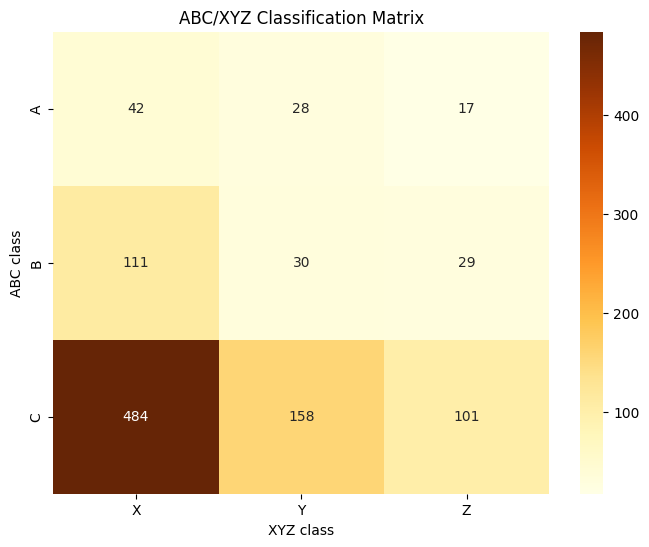

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('ABC/XYZ Classification Matrix')
plt.ylabel('ABC class')
plt.xlabel('XYZ class')
plt.show()


### ✅ A/X (42 SKU) — **Golden Core**

* High revenue contribution
* Stable demand
* **Actions:**

  * Keep maximum priority
  * Ensure constant availability
  * Monitor sales closely
  * Prevent out-of-stock under any circumstances
  * Apply automated replenishment

---

### ✅ A/Y (28 SKU) — **Important but Fluctuating**

* High value
* Medium stability
* **Actions:**

  * Track trends and seasonality
  * Use advanced demand forecasting (e.g., moving averages)
  * Maintain medium inventory levels
  * Plan promotions if recurring dips occur

---

### ✅ A/Z (17 SKU) — **High-Risk, High-Value**

* Very important
* Highly unstable
* **Actions:**

  * Investigate instability causes: promotions, supply disruptions, seasonality
  * Apply JIT (just in time) approach
  * Avoid overstocking
  * Align with commercial strategy: “keep on order” or “pulse purchasing”

---

### 🟨 B/X (111 SKU) — **Reliable Workhorses**

* Medium value
* Stable demand
* **Actions:**

  * Maintain stable stock
  * Purchasing can be automated
  * Monitor inventory without over-controlling

---

### 🟨 B/Y (30 SKU) — **Less Stable, Medium Value**

* Harder to forecast
* **Actions:**

  * Apply moderate buffer stock
  * Monitor demand spikes
  * Use manual control or ML models trained on fluctuations

---

### 🟨 B/Z (29 SKU) — **Unstable, Medium Value**

* Poorly forecasted
* **Actions:**

  * Minimize inventory
  * Order on demand
  * Avoid keeping “just in case” stock

---

### 🟥 C/X (484 SKU) — **Many, Stable, Low-Cost**

* Low revenue contribution but predictable
* **Actions:**

  * Use automated replenishment on residual principle
  * Deploy in long-tail channels (marketplaces, promotions, sales)
  * Bundle in promotional sets

---

### 🟥 C/Y (158 SKU) — **Many, Moderately Predictable**

* Inefficient and unstable
* **Actions:**

  * Analyze necessity
  * Reduce SKU count
  * Discount or include in clearance sales

---

### 🟥 C/Z (101 SKU) — **Bottom Ballast**

* Minimal contribution + chaotic demand
* **Actions:**

  * Optimize: remove from storage
  * Write-off or liquidate
  * Switch to on-demand ordering
  * Avoid keeping in stock

In [22]:
df_sorted.columns.to_list()

['Item_ID',
 'Item_Name',
 'Category',
 'Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand',
 'Total_Annual_Units',
 'Price_Per_Unit',
 'Total_Sales_Value',
 'Cumulative_Sales',
 'Cumulative_Percent',
 'ABC_Class',
 'Mean_Demand',
 'Std_Demand',
 'CV_Demand',
 'XYZ_Class',
 'ABC_XYZ']

In [23]:
# Grouping: Revenue by ABC/XYZ
revenue_by_group = df_sorted.groupby('ABC_XYZ')['Total_Sales_Value'].sum().reset_index()

In [24]:
# Sorting by Revenue
revenue_by_group = revenue_by_group.sort_values(by='Total_Sales_Value', ascending=False)

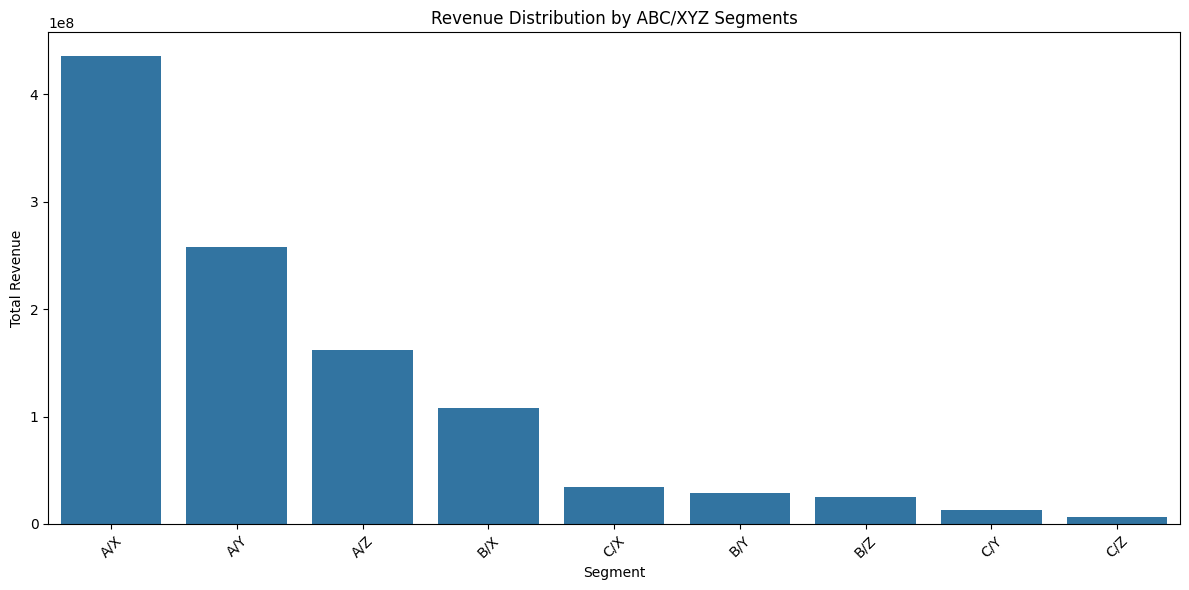

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_group, x='ABC_XYZ', y='Total_Sales_Value')
plt.title('Revenue Distribution by ABC/XYZ Segments')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
